In [2]:
#!pip install mlxtend 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
from matplotlib import cm
from sklearn.metrics import silhouette_samples


## load the data 

In [5]:
tips = sns.load_dataset("tips");tips[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# faceted plot 

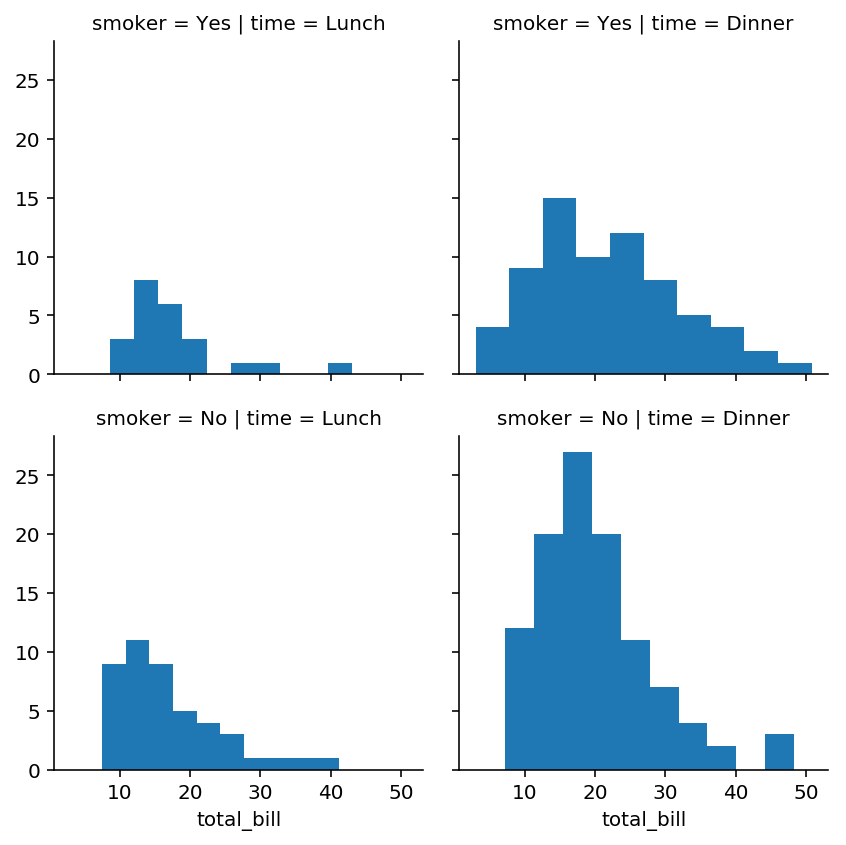

In [6]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

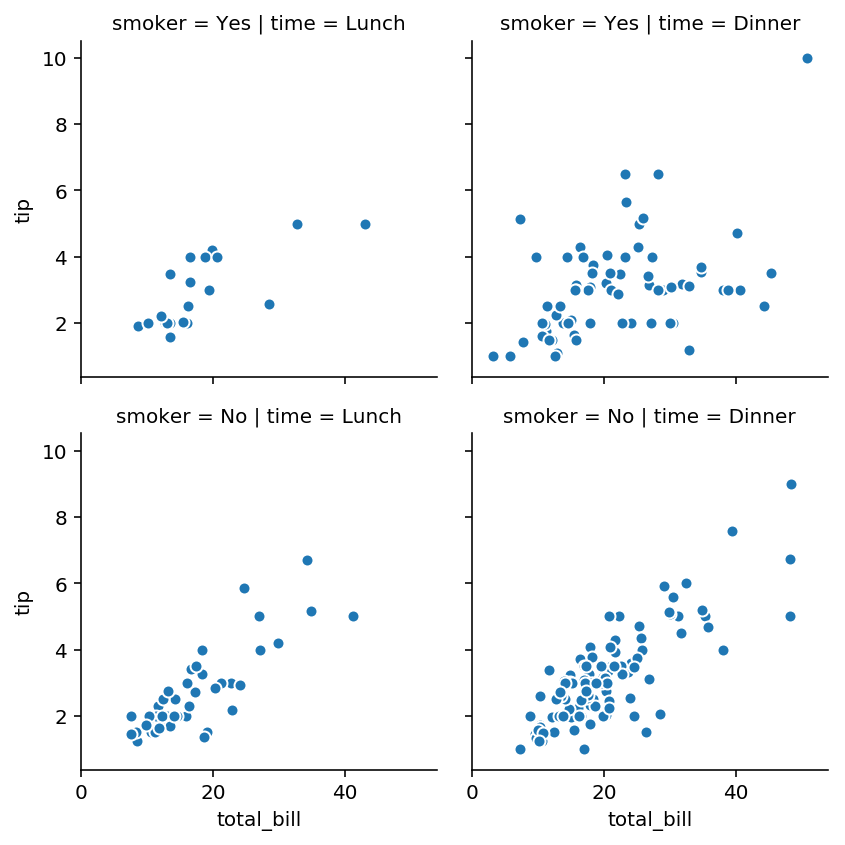

In [7]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w")

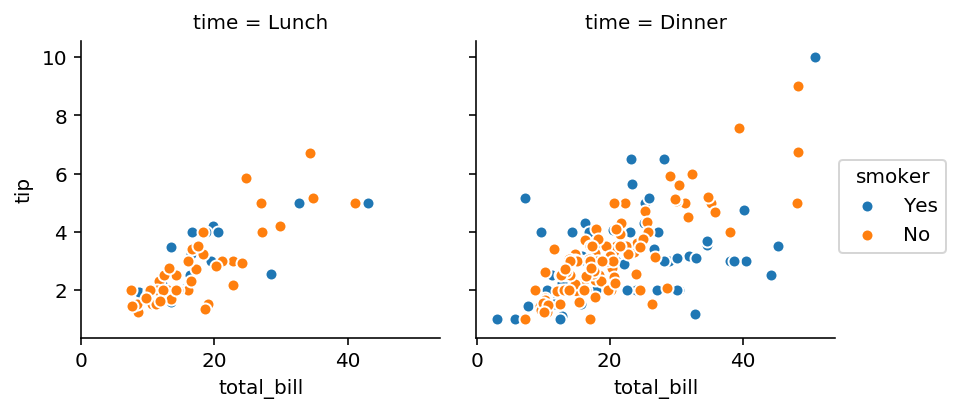

In [8]:
g = sns.FacetGrid(tips, col="time",  hue="smoker")
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w").add_legend())

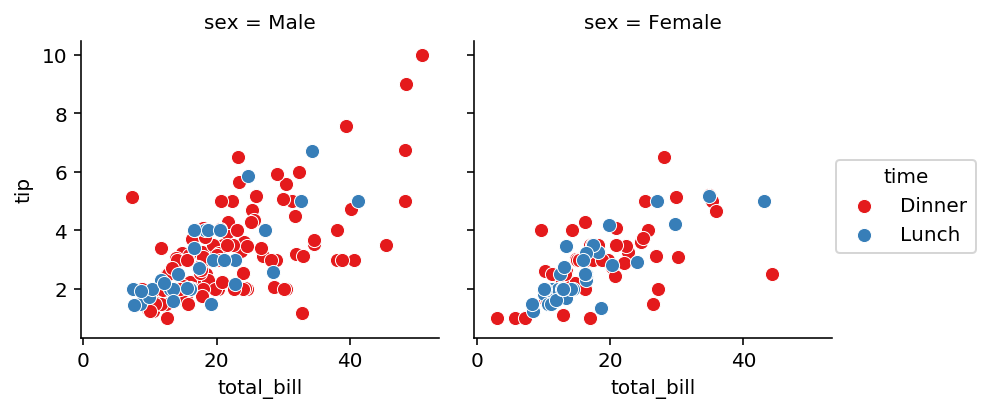

In [9]:
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set1", hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

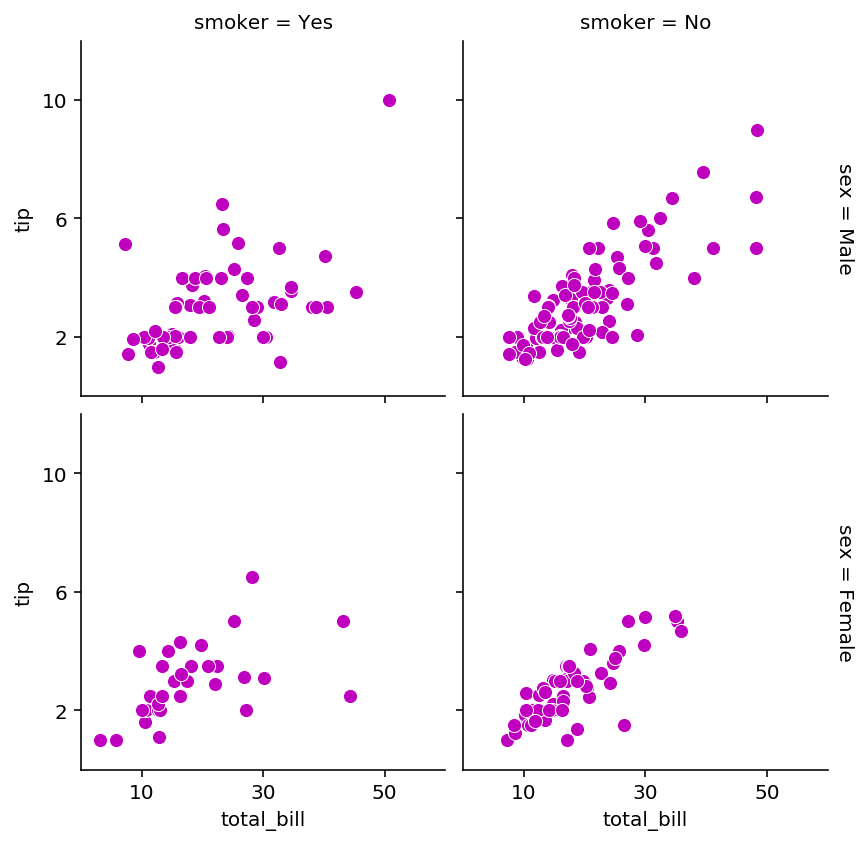

In [10]:
g = sns.FacetGrid(tips, col="smoker", row="sex", margin_titles=True)
g = (g.map(plt.scatter, "total_bill", "tip", color="m", **kws).set(xlim=(0, 60), ylim=(0, 12),
                                                                   xticks=[10, 30, 50], yticks=[2, 6, 10]).fig.subplots_adjust(wspace=.05, hspace=.05))

In [30]:
maps1 = {'No': 0, 'Yes':1}
tips['smoker_label'] = tips['smoker'].map(maps1)
maps2 = {'Female': 0, 'Male': 1}
tips['sex_label'] = tips['sex'].map(maps2)
maps3 = {'Lunch': 0, 'Dinner':1}
tips['time_label'] = tips['time'].map(maps3)

In [11]:
X = tips.iloc[:, :2]

## Use elbow to select the best model

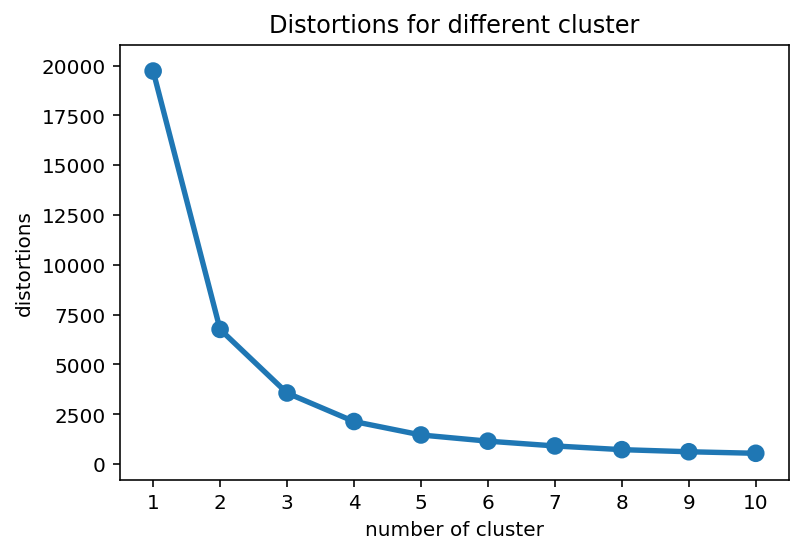

In [13]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
                init = "k-means++",
                n_init = 20,
                max_iter = 300,
                random_state = 0)
    km.fit_predict(X)
    #y_pred = knn.predict(X_test_std)
    distortions.append(km.inertia_)


x = np.arange(1,11,1)
sns.pointplot(x, distortions, marker = 'o')
plt.xlabel('number of cluster')
plt.ylabel('distortions')
plt.title('Distortions for different cluster')
plt.show()

As we can see in the following plot, the elbow is located at k=2, which is evidence that 
k=2 is indeed a good choice for this dataset. And it is also the right K for this dataset.

# silhouette plot

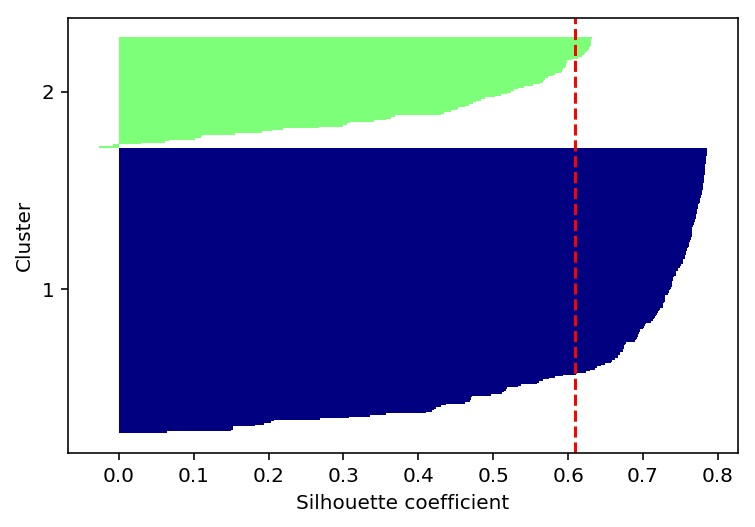

In [15]:
km = KMeans(n_clusters=2,
             init='k-means++',
             n_init=10,
             max_iter=300,
             tol=1e-04,
             random_state=0)
clusters = km.fit_predict(X)
cluster_labels = np.unique(clusters)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, 
                                    clusters,
                                    metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color = 'red',
           linestyle = '--')
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In above graph, the silhouette plot is not that accurately show the right cluster.

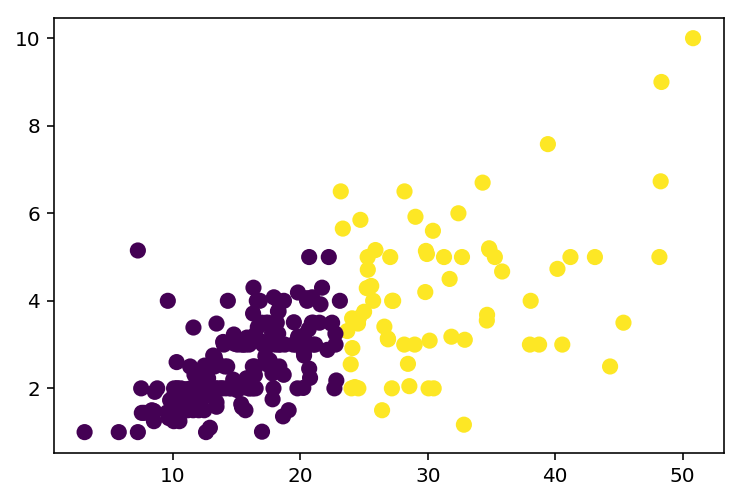

In [17]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels,
            s=50, cmap='viridis');

In [19]:
tips['cluster'] = labels

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,cluster,smoker_label,sex_label,time_label
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,0,1


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(tips['smoker_label'], tips['cluster'])

0.60245901639344257

In [32]:
accuracy_score(tips['sex_label'], tips['cluster'])

0.47950819672131145

In [33]:
accuracy_score(tips['time_label'], tips['cluster'])

0.46721311475409838

In this case, kmeans works best to cluster smokers based on tip and total bills.